# Case Study 3 workout (continued)
The actual coding of the optimization

### Repeat of code from previous notebooks.
`0418.06.Dec.19`

In [2]:
# Run the code written in notebook 02
%run 'baker-cs34-functions.py'

displaySize = np.recarray(1, coordinate)
displaySize.x = 10
displaySize.y = 10
numLinspace = 25
numGridLines = 25                   # How many gridlines we'll use for the visualization
gridLinspace = np.linspace(0, 1, numLinspace, endpoint=True)

# Grid the remaining areas
`0345.06.Dec.19`

In [3]:
#- Rip the boundary coordinates from the .yaml file -#
fn = "iea37-boundary-cs4.yaml"
[coordList3a, coordList3b, coordList4a, coordList4b, coordList4c] = getTurbAtrbtCs4YAML(fn)
#print(coordList3a)
#print(coordList3b)
clsdBP3a = closeBndryList(coordList3a)    # Duplicate the first coordinate for a closed boundary
clsdBP3b = closeBndryList(coordList3b)    # Duplicate the first coordinate for a closed boundary
clsdBP4a = closeBndryList(coordList4a)    # Duplicate the first coordinate for a closed boundary
clsdBP4b = closeBndryList(coordList4b)    # Duplicate the first coordinate for a closed boundary
clsdBP4c = closeBndryList(coordList4c)    # Duplicate the first coordinate for a closed boundary
clsdBP3a = closeBndryList(clsdBP3a)
clsdBP3b = closeBndryList(clsdBP3b)
clsdBP4a = closeBndryList(clsdBP4a)
clsdBP4b = closeBndryList(clsdBP4b)
clsdBP4c = closeBndryList(clsdBP4c)

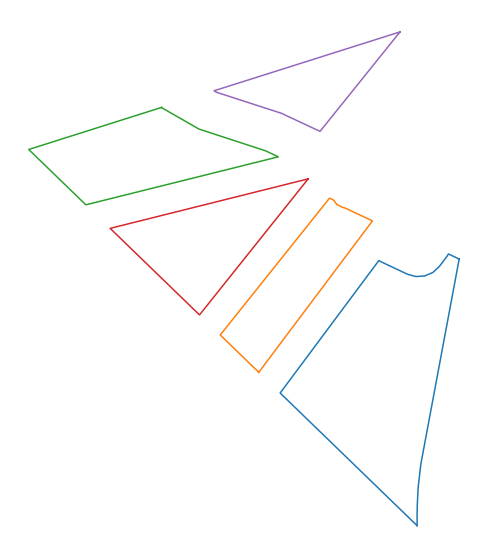

In [4]:
#-- Print the full farm --#
printBoundary(clsdBP3a,displaySize)
printBoundary(clsdBP3b,displaySize)
printBoundary(clsdBP4a,displaySize)
printBoundary(clsdBP4b,displaySize)
printBoundary(clsdBP4c,displaySize)

## Individual sections

### Do area 3a

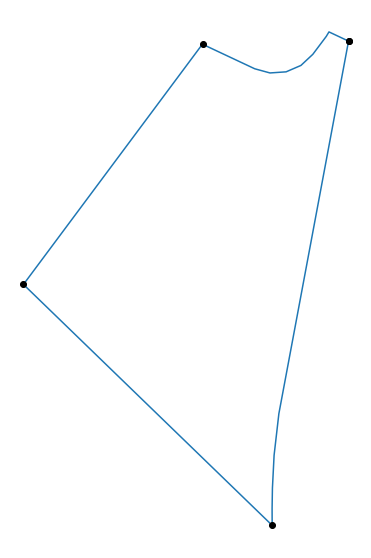

In [5]:
# -- Plot our boundary (as given) --#
printBoundary(clsdBP3a,displaySize)
vertexList3a = [0, 6, 8, 9, 18]       # Hard code the vertices (though this could be done algorithmically)
numSides3a = len(vertexList3a) - 1      # The number of sides for our original coordinate system. Usually (4) to Euclidean, but could be any number)
printVerticies(clsdBP3a, vertexList3a, 'black')

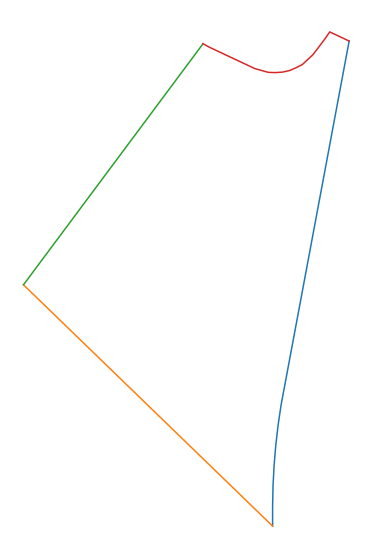

In [6]:
#-- Plot our space (with splines) --#
splineList3a = np.empty(numSides3a, interp1d)                  # Init. array IOT save the Splines for each "side"
segCoordList3a = np.recarray([numSides3a, numGridLines], coordinate)

#- Create the splines for each side (<numSides> many)-#
for i in range(numSides3a):
    BndPts3a = clsdBP3a[vertexList3a[i]:(vertexList3a[i+1]+1)]      # Extract the points for the "edge" we want
    segCoordList3a[i] = sliceBoundary(BndPts3a, numGridLines)    # Reparameterize the boundry to be defined by <numGridLines> many points
    splineList3a[i] = interp1d(segCoordList3a[i].x, segCoordList3a[i].y, kind='linear')   # Make the spline using NumPy's <interp1d>
    
# Plot the boundary and the endpoints.
for i in range(numSides3a):
    plt.hold = True
    printBoundaryArray(segCoordList3a[i].x, splineList3a[i](segCoordList3a[i].x), displaySize)
    

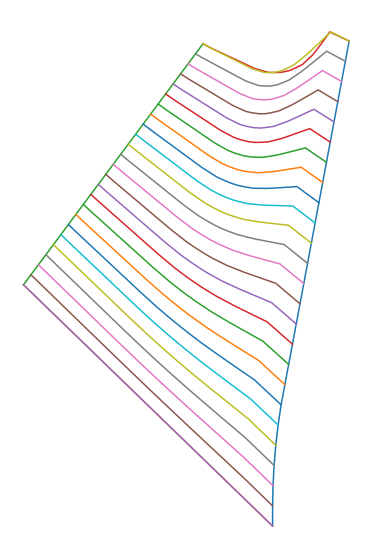

In [14]:
#-- Plot the grids --#
# Plot the boundary and the endpoints.
for i in range(numSides3a):
    plt.hold = True
    printBoundaryArray(segCoordList3a[i].x, splineList3a[i](segCoordList3a[i].x), displaySize)

#- Plot the mesh -#
[horizLineArrayTrs3a, vertLineArrayTrs3a] = computeVertLines(splineList3a, segCoordList3a, numGridLines, numLinspace, numSides3a)

#for i in range(numGridLines):
    #plt.plot(vertLineArrayTrs3a[i].x, vertLineArrayTrs3a[i].y)
for i in range(numLinspace):
    plt.plot(horizLineArrayTrs3a[i].x, horizLineArrayTrs3a[i].y)

### Do area 3b

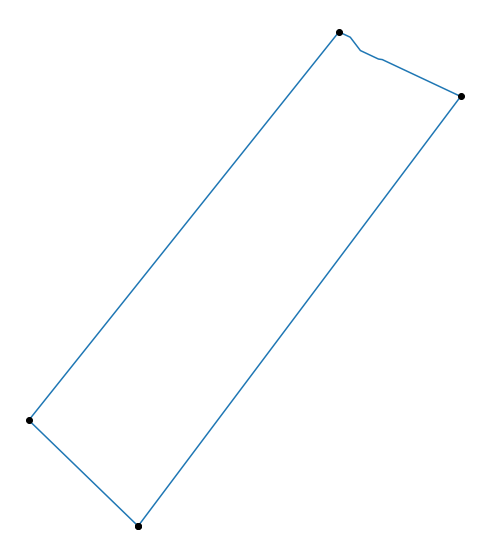

In [7]:
# -- Plot our boundary (as given) --#
printBoundary(clsdBP3b,displaySize)
vertexList3b = [0, 1, 2, 7, 8]       # Hard code the vertices (though this could be done algorithmically)
numSides3b = len(vertexList3b) - 1      # The number of sides for our original coordinate system. Usually (4) to Euclidean, but could be any number)
printVerticies(clsdBP3b, vertexList3b, 'black')

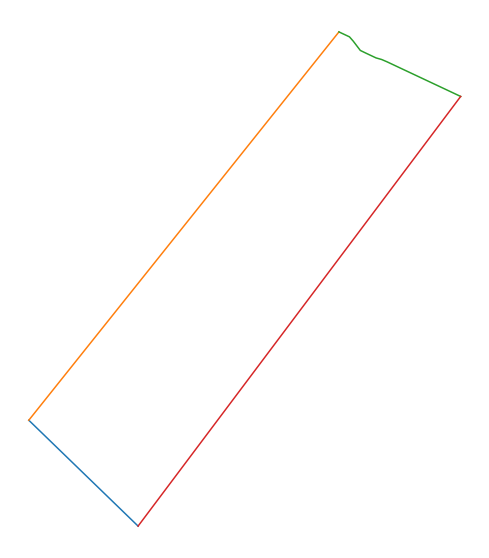

In [8]:
#-- Plot our space (with splines) --#
splineList3b = np.empty(numSides3b, interp1d)                  # Init. array IOT save the Splines for each "side"
segCoordList3b = np.recarray([numSides3b, numGridLines], coordinate)

#- Create the splines for each side (<numSides> many)-#
for i in range(numSides3b):
    BndPts3b = clsdBP3b[vertexList3b[i]:(vertexList3b[i+1]+1)]      # Extract the points for the "edge" we want
    segCoordList3b[i] = sliceBoundary(BndPts3b, numGridLines)    # Reparameterize the boundry to be defined by <numGridLines> many points
    splineList3b[i] = interp1d(segCoordList3b[i].x, segCoordList3b[i].y, kind='linear')   # Make the spline using NumPy's <interp1d>
    
# Plot the boundary and the endpoints.
for i in range(numSides3b):
    plt.hold = True
    printBoundaryArray(segCoordList3b[i].x, splineList3b[i](segCoordList3b[i].x), displaySize)
    

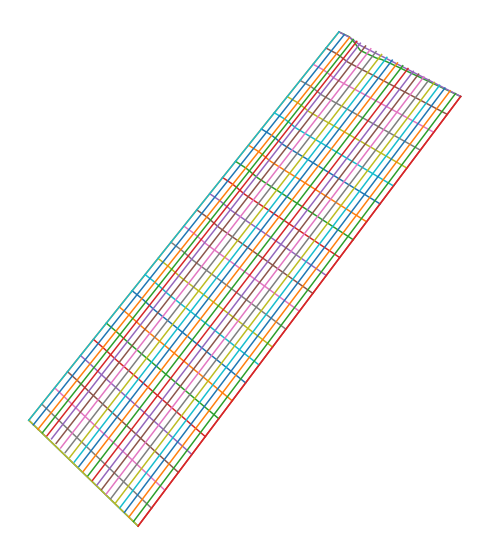

In [9]:
#-- Plot the grids --#
# Plot the boundary and the endpoints.
for i in range(numSides3b):
    plt.hold = True
    printBoundaryArray(segCoordList3b[i].x, splineList3b[i](segCoordList3b[i].x), displaySize)

#-- Plot the mesh --#
[horizLineArrayTrs3b, vertLineArrayTrs3b] = computeVertLines(splineList3b, segCoordList3b, numGridLines, numLinspace, numSides3b)

for i in range(numGridLines):
    plt.plot(vertLineArrayTrs3b[i].x, vertLineArrayTrs3b[i].y)
for i in range(numLinspace):
    plt.plot(horizLineArrayTrs3b[i].x, horizLineArrayTrs3b[i].y)

### Do area 4a

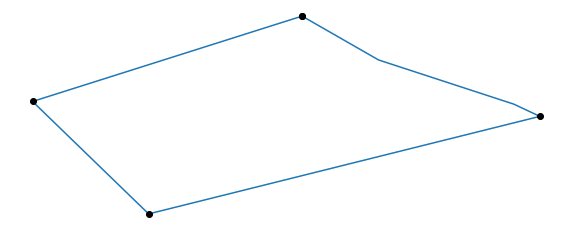

In [10]:
# -- Plot our boundary (as given) --#
printBoundary(clsdBP4a,displaySize)
vertexList4a = [0, 3, 4, 5, 6]       # Hard code the vertices (though this could be done algorithmically)
numSides4a = len(vertexList4a) - 1      # The number of sides for our original coordinate system. Usually (4) to Euclidean, but could be any number)
printVerticies(clsdBP4a, vertexList4a, 'black')

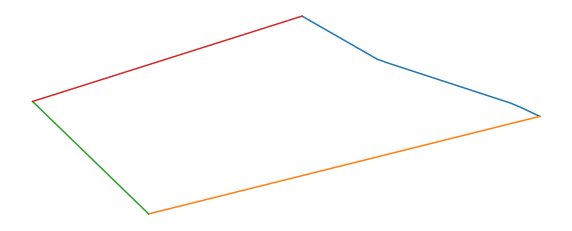

In [11]:
#-- Plot our space (with splines) --#
splineList4a = np.empty(numSides4a, interp1d)                  # Init. array IOT save the Splines for each "side"
segCoordList4a = np.recarray([numSides4a, numGridLines], coordinate)

#- Create the splines for each side (<numSides> many)-#
for i in range(numSides4a):
    BndPts4a = clsdBP4a[vertexList4a[i]:(vertexList4a[i+1]+1)]      # Extract the points for the "edge" we want
    segCoordList4a[i] = sliceBoundary(BndPts4a, numGridLines)    # Reparameterize the boundry to be defined by <numGridLines> many points
    splineList4a[i] = interp1d(segCoordList4a[i].x, segCoordList4a[i].y, kind='linear')   # Make the spline using NumPy's <interp1d>
    
# Plot the boundary and the endpoints.
for i in range(numSides4a):
    plt.hold = True
    printBoundaryArray(segCoordList4a[i].x, splineList4a[i](segCoordList4a[i].x), displaySize)
    

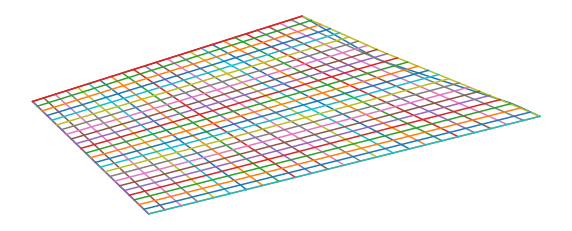

In [12]:
#-- Plot the grids --#
# Plot the boundary and the endpoints.
for i in range(numSides4a):
    plt.hold = True
    printBoundaryArray(segCoordList4a[i].x, splineList4a[i](segCoordList4a[i].x), displaySize)

#-- Plot the mesh --#
[horizLineArrayTrs4a, vertLineArrayTrs4a] = computeVertLines(splineList4a, segCoordList4a, numGridLines, numLinspace, numSides4a)

for i in range(numGridLines):
    plt.plot(vertLineArrayTrs4a[i].x, vertLineArrayTrs4a[i].y)
for i in range(numLinspace):
    plt.plot(horizLineArrayTrs4a[i].x, horizLineArrayTrs4a[i].y)

### Do area 4b

There's a problem here that it's only 3 points. I'm not sure how to insert a 4th for a proper grid.

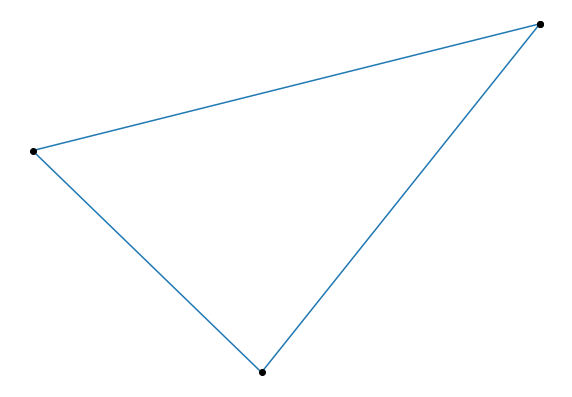

In [13]:
# -- Plot our boundary (as given) --#
printBoundary(clsdBP4b,displaySize)
vertexList4b = [0, 1, 2, 3]       # Hard code the vertices (though this could be done algorithmically)
numSides4b = len(vertexList4b) - 1      # The number of sides for our original coordinate system. Usually (4) to Euclidean, but could be any number)
printVerticies(clsdBP4b, vertexList4b, 'black')

`0520.06.Dec.19`<br/>
I'm going to have to insert a new point so that I can have 4 sides to map.

In [14]:
#- Insert a new pointe between the 2nd and 3rd indexes -#
newX= (clsdBP4b[2].x + clsdBP4b[3].x) /2
newY= (clsdBP4b[2].y + clsdBP4b[3].y) /2

# Determine a new vertex
newPt = np.recarray(1, coordinate)
newPt.x = newX
newPt.y = newY

# Insert the new vertex in our list of points
clsdBP4b2 = np.recarray(len(clsdBP4b), coordinate)
clsdBP4b2[0] = clsdBP4b[0]
clsdBP4b2[1] = clsdBP4b[1]
clsdBP4b2[2] = clsdBP4b[2]
clsdBP4b2[3] = newPt
clsdBP4b2[4] = clsdBP4b[3]
#print(clsdBP4b2)

# Add the new vertex
vertexList4b = [0, 1, 2, 3, 4]       # Hard code the vertices (though this could be done algorithmically)
numSides4b = len(vertexList4b) - 1      # The number of sides for our original coordinate system. Usually (4) to Euclidean, but could be any number)

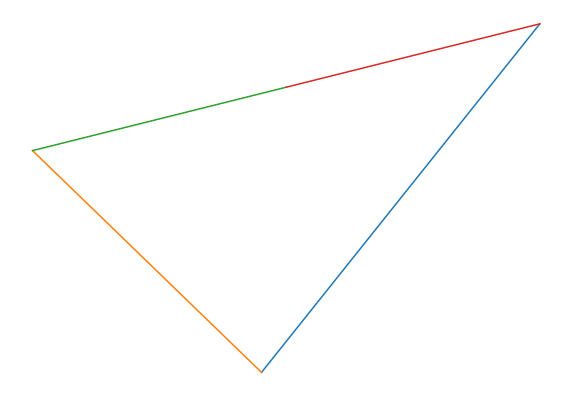

In [15]:
#-- Plot our space (with splines) --#
splineList4b = np.empty(numSides4b, interp1d)                  # Init. array IOT save the Splines for each "side"
segCoordList4b = np.recarray([numSides4b, numGridLines], coordinate)

#- Create the splines for each side (<numSides> many)-#
for i in range(numSides4b):
    BndPts4b = clsdBP4b2[vertexList4b[i]:(vertexList4b[i+1]+1)]      # Extract the points for the "edge" we want
    segCoordList4b[i] = sliceBoundary(BndPts4b, numGridLines)    # Reparameterize the boundry to be defined by <numGridLines> many points
    splineList4b[i] = interp1d(segCoordList4b[i].x, segCoordList4b[i].y, kind='linear')   # Make the spline using NumPy's <interp1d>
    
# Plot the boundary and the endpoints.
for i in range(numSides4b):
    plt.hold = True
    printBoundaryArray(segCoordList4b[i].x, splineList4b[i](segCoordList4b[i].x), displaySize)
    

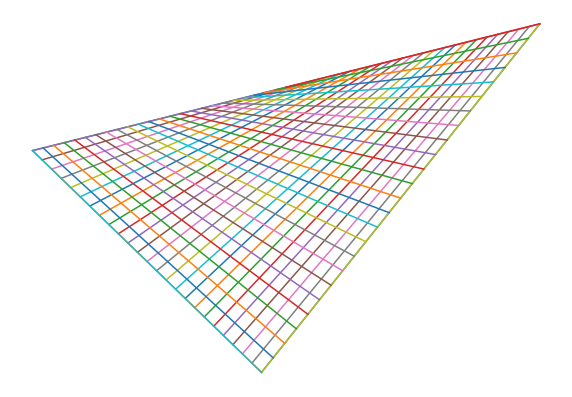

In [16]:
#-- Plot the grids --#
# Plot the boundary and the endpoints.
for i in range(numSides4b):
    plt.hold = True
    printBoundaryArray(segCoordList4b[i].x, splineList4b[i](segCoordList4b[i].x), displaySize)

#-- Plot the mesh --#
[horizLineArrayTrs4b, vertLineArrayTrs4b] = computeVertLines(splineList4b, segCoordList4b, numGridLines, numLinspace, numSides4b)

for i in range(numGridLines):
    plt.plot(vertLineArrayTrs4b[i].x, vertLineArrayTrs4b[i].y)
for i in range(numLinspace):
    plt.plot(horizLineArrayTrs4b[i].x, horizLineArrayTrs4b[i].y)

### Do area 4c

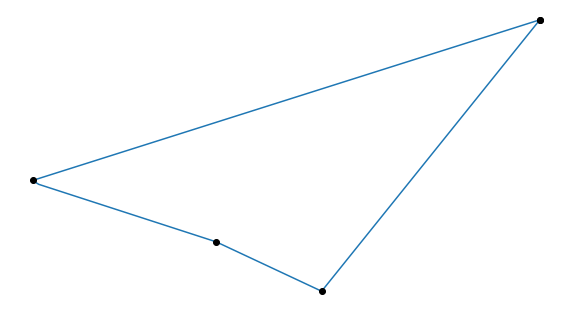

In [17]:
# -- Plot our boundary (as given) --#
printBoundary(clsdBP4c,displaySize)
vertexList4c = [0, 1, 2, 4, 5]      # Hard code the vertices (though this could be done algorithmically)
numSides4c = len(vertexList4c) - 1      # The number of sides for our original coordinate system. Usually (4) to Euclidean, but could be any number)
printVerticies(clsdBP4c, vertexList4c, 'black')

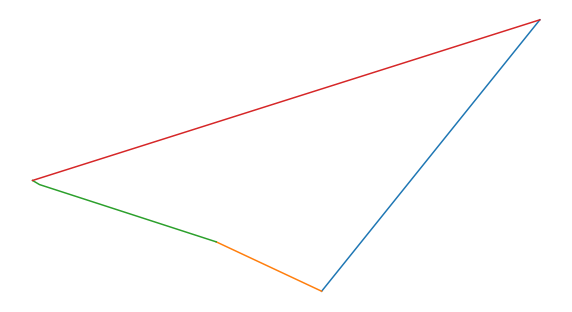

In [18]:
#-- Plot our space (with splines) --#
splineList4c = np.empty(numSides4c, interp1d)                  # Init. array IOT save the Splines for each "side"
segCoordList4c = np.recarray([numSides4c, numGridLines], coordinate)

#- Create the splines for each side (<numSides> many)-#
for i in range(numSides4c):
    BndPts4c = clsdBP4c[vertexList4c[i]:(vertexList4c[i+1]+1)]      # Extract the points for the "edge" we want
    segCoordList4c[i] = sliceBoundary(BndPts4c, numGridLines)    # Reparameterize the boundry to be defined by <numGridLines> many points
    splineList4c[i] = interp1d(segCoordList4c[i].x, segCoordList4c[i].y, kind='linear')   # Make the spline using NumPy's <interp1d>
    
# Plot the boundary and the endpoints.
for i in range(numSides4c):
    plt.hold = True
    printBoundaryArray(segCoordList4c[i].x, splineList4c[i](segCoordList4c[i].x), displaySize)
    

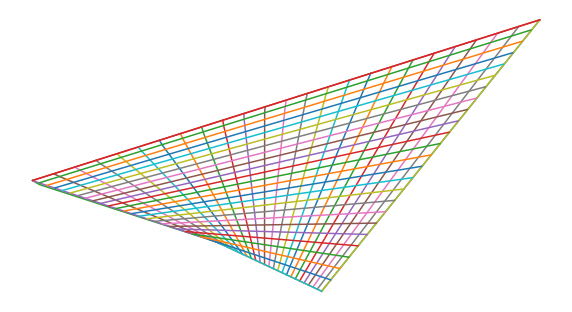

In [19]:
#-- Plot the grids --#
# Plot the boundary and the endpoints.
for i in range(numSides4c):
    plt.hold = True
    printBoundaryArray(segCoordList4c[i].x, splineList4c[i](segCoordList4c[i].x), displaySize)

#-- Plot the mesh --#
[horizLineArrayTrs4c, vertLineArrayTrs4c] = computeVertLines(splineList4c, segCoordList4c, numGridLines, numLinspace, numSides4c)

for i in range(numGridLines):
    plt.plot(vertLineArrayTrs4c[i].x, vertLineArrayTrs4c[i].y)
for i in range(numLinspace):
    plt.plot(horizLineArrayTrs4c[i].x, horizLineArrayTrs4c[i].y)

## Put them all together
`0603.06.Dec.19`

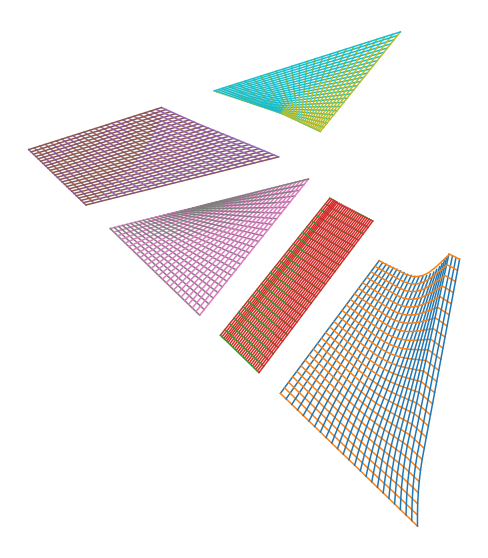

In [20]:
for i in range(numGridLines):
    plt.plot(vertLineArrayTrs3a[i].x, vertLineArrayTrs3a[i].y)
    plt.plot(horizLineArrayTrs3a[i].x, horizLineArrayTrs3a[i].y)
    plt.plot(vertLineArrayTrs3b[i].x, vertLineArrayTrs3b[i].y)
    plt.plot(horizLineArrayTrs3b[i].x, horizLineArrayTrs3b[i].y)
    plt.plot(vertLineArrayTrs4a[i].x, vertLineArrayTrs4a[i].y)
    plt.plot(horizLineArrayTrs4a[i].x, horizLineArrayTrs4a[i].y)
    plt.plot(vertLineArrayTrs4b[i].x, vertLineArrayTrs4b[i].y)
    plt.plot(horizLineArrayTrs4b[i].x, horizLineArrayTrs4b[i].y)
    plt.plot(vertLineArrayTrs4c[i].x, vertLineArrayTrs4c[i].y)
    plt.plot(horizLineArrayTrs4c[i].x, horizLineArrayTrs4c[i].y)
    plt.axis('scaled')                      # Trim the white space
    plt.axis('off')                         # Turn off the framing
    plt.gcf().set_size_inches(displaySize.x, displaySize.y)   # Make it big and readable

Dr. Ning says to have some stuck on the boundary permamnently that can only mocve along the boundary. It will artificially block the others.

Also just treat the triangles as triangles. Don't map a 4-sided space to them. It artificailly messes witht the gradients.

## Optimization of cs3